<a href="https://colab.research.google.com/github/appyjais/Text-Classification-and-summary/blob/main/Text_Classification_and_top_phrase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
path = '/content/drive/MyDrive/Assignment/securly/dataset/dataset/train.csv/train.csv'
df = pd.read_csv(path)

In [104]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [105]:
df['len'] = df['comment_text'].str.len()

In [106]:
pd.set_option('display.max_colwidth', -1)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,len
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0,264
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0,67


In [107]:
sum(df.duplicated())

0

# EDA

In [108]:
df[df['toxic']==1]['comment_text'].head()

6     COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
12    Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...  

In [109]:
df[df['severe_toxic']==1]['comment_text'].head()

6      COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK                                             
55     Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell!
181    you are a stupid fuck \n\nand your mother's cunt stinks                                  
442    Hi \n\nIm a fucking bitch.\n\n50.180.208.181                                             
579    What a motherfucking piece of crap those fuckheads for blocking us!                      
Name: comment_text, dtype: object

In [110]:
df[df['obscene']==1]['comment_text'].head()

6     COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
42    You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - 

In [111]:
df[df['threat']==1]['comment_text'].head()

79      Hi! I am back again!\nLast warning!\nStop undoing my edits or die!                                                                                    
176     I think that your a Fagget get a oife and burn in Hell I hate you 'm sorry we cant have any more sex i'm running out of conndoms                      
600     I'm also a sock puppet of this account...SUPRISE!!\n-sincerely,\n            The man that will track you down from the Internet and kill you          
802     Fuck you, Smith. Please have me notified when you die. I want to dance on your grave.                                                                 
1017    WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'LL FIND OUT WHERE YOU LIVE, SODOMIZE YOUR WIFE AND THEN BURN YOUR HOUSE DOWN. FUCK YOU YOU FUCKING QUEER.
Name: comment_text, dtype: object

In [112]:
df[df['insult']==1]['comment_text'].head()

6     COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
42    You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - 

In [113]:
df[df['identity_hate']==1]['comment_text'].head()

42     You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!\n\n3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!\n\nBeware of the Dark Side!
105    A pair of jew-hating weiner nazi schmucks.                                                                                                                                                                                                                                                                                         

In [114]:
print(df.shape)
n = df.shape[0]

(159571, 9)


In [115]:
tags = ['toxic', 'severe_toxic','obscene', 'threat', 'insult', 'identity_hate']


class toxic appear max no. of times with 9% of data
class severe toxic min no. of times with .9% of data


In [116]:
df['Total_Tags'] = df['toxic'] + df['severe_toxic'] + df['obscene'] + df['threat'] + df['insult'] + df['identity_hate']

In [117]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,len,Total_Tags
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0,264,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0,112,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0,233,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0,622,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0,67,0


In [118]:
print('safe comments: ',df[df['Total_Tags'] == 0].shape[0]/n*100, '%')

safe comments:  89.83211235124176 %


In [119]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,len,Total_Tags
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,394.073221,0.219952
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,590.720282,0.748260
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,435.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5000.000000,6.000000


In [120]:
(df.isna().sum()/n*100).reset_index()

,index,0
0,id,0.0
1,comment_text,0.0
2,toxic,0.0
3,severe_toxic,0.0
4,obscene,0.0
5,threat,0.0
6,insult,0.0
7,identity_hate,0.0
8,len,0.0
9,Total_Tags,0.0


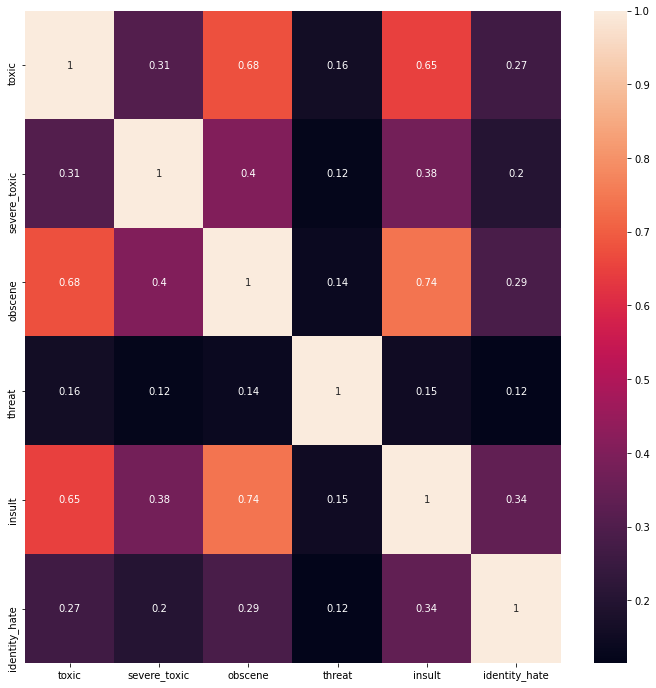

In [121]:
correlation = df[tags].corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation,annot= True)

In [122]:
from wordcloud import WordCloud ,STOPWORDS

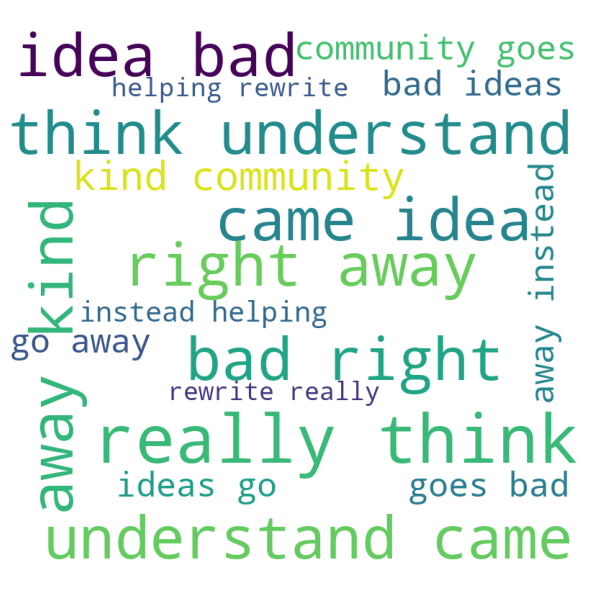

In [123]:
stopwords = set(STOPWORDS) 
for comment in df.comment_text:
  comment_words = ''
  com = str(comment)
  tokens = com.split() 
      
  # Converts each token into lowercase 
  for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [124]:
def visualize_word(df):
  stopwords = set(STOPWORDS) 
  for comment in df.comment_text:
    comment_words = ''
    com = str(comment)
    tokens = com.split() 
        
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
      tokens[i] = tokens[i].lower()
      comment_words += " ".join(tokens)+" "
    
  wordcloud = WordCloud(width = 800, height = 800, 
                  background_color ='white', 
                  stopwords = stopwords, 
                  min_font_size = 10).generate(comment_words) 
    
  # plot the WordCloud image                        
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
    
  plt.show() 

Seeing the freq non toxic comment word

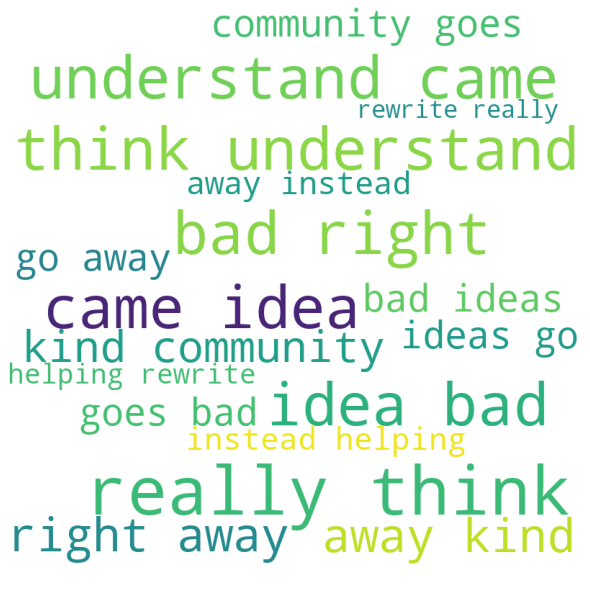

In [126]:
visualize_word(df[df['Total_Tags']==0])

Seeing the freq toxic comments

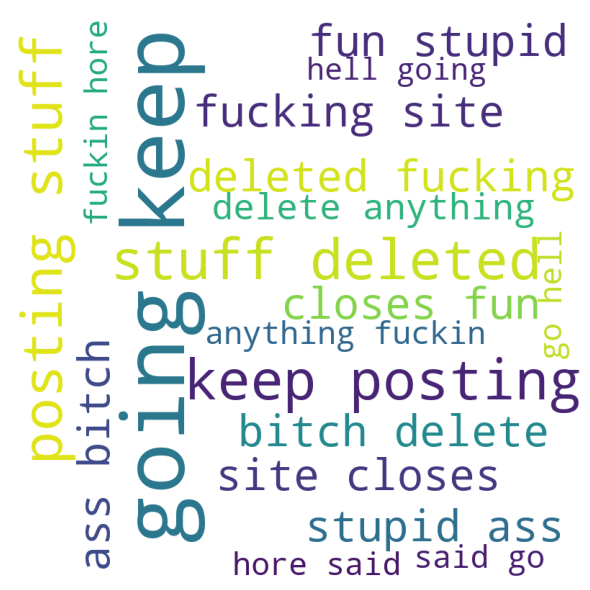

In [127]:
visualize_word(df[df['toxic']==1])

Seeing the freq severe_toxic comments

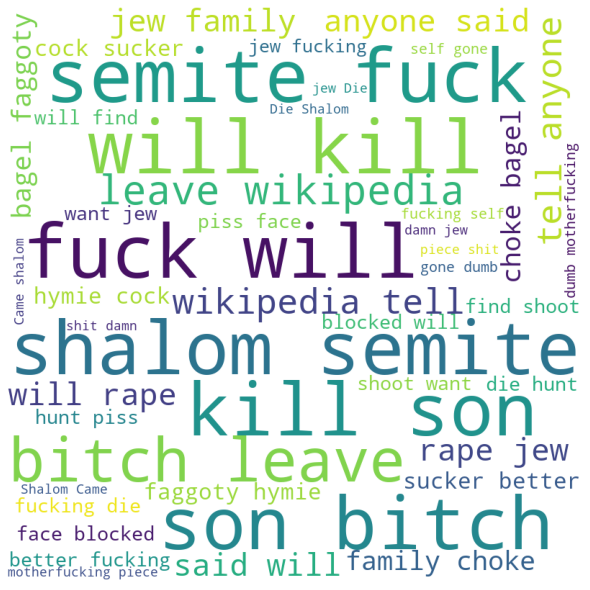

In [128]:
visualize_word(df[df['severe_toxic']==1])

Seeing the freq obscene comments

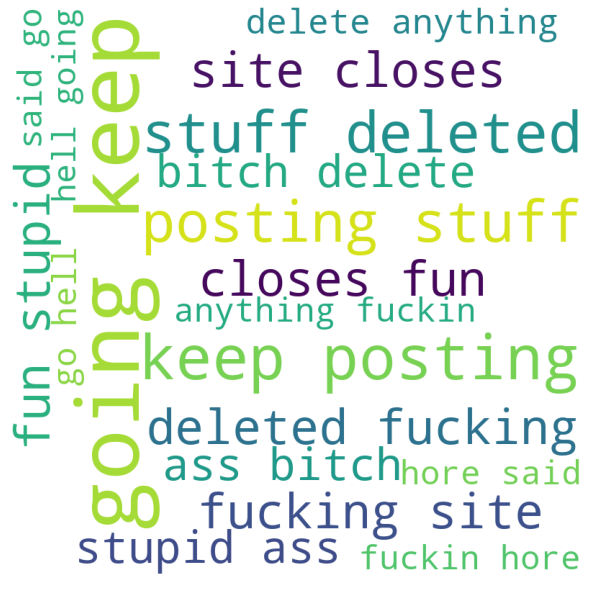

In [129]:
visualize_word(df[df['obscene']==1])

Seeing the freq threat comments

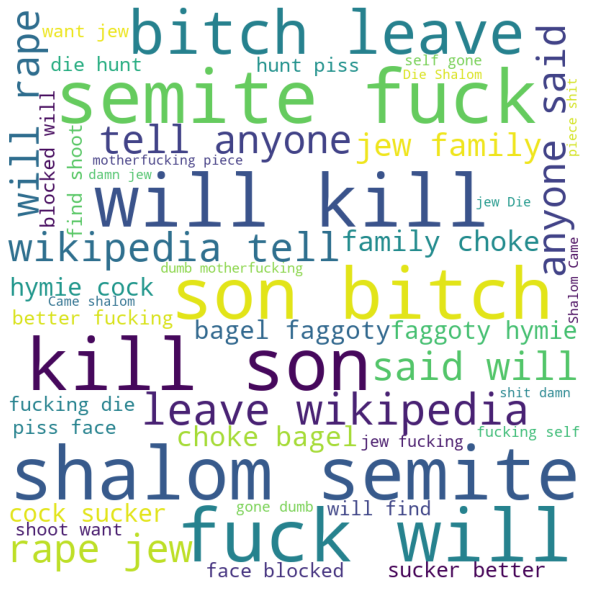

In [130]:
visualize_word(df[df['threat']==1])

Seeing the freq insult comments

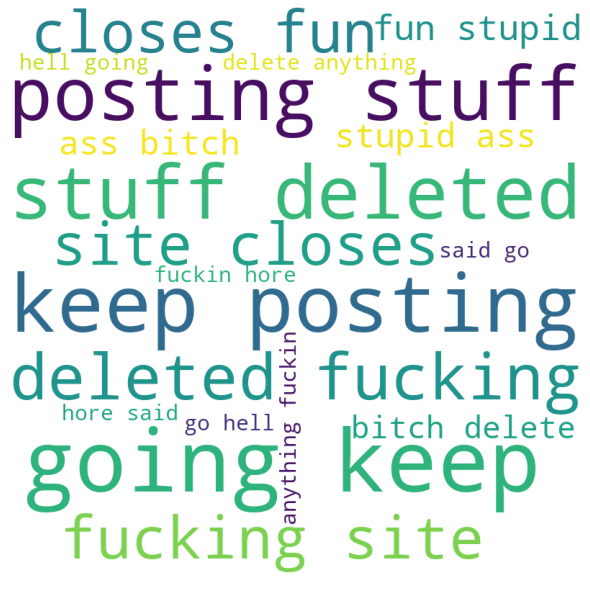

In [131]:
visualize_word(df[df['insult']==1])

Seeing the freq identity_hate comments

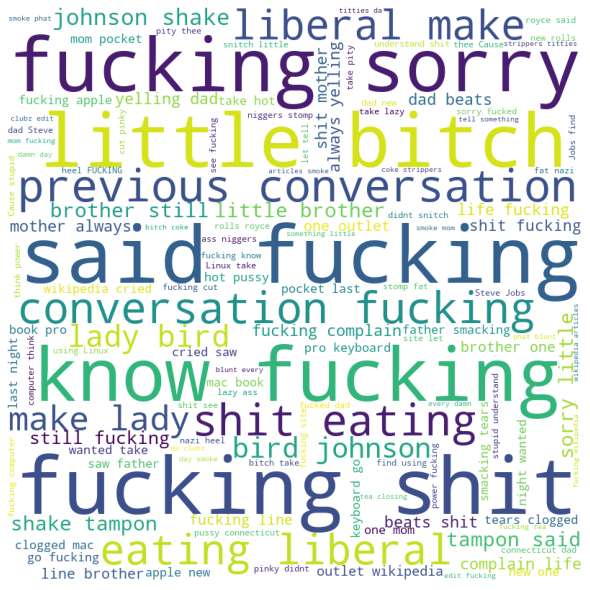

In [132]:
visualize_word(df[df['identity_hate']==1])

# TFIDF

In [ ]:
'''
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
'''

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
'''
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['comment_text'][i])
    review = review.lower().split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english') and len(word)<100]
    review = ' '.join(review)
    corpus.append(review)
'''

KeyboardInterrupt: ignored

In [ ]:
#print(corpus[0])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

import numpy as np
import itertools
from sklearn.metrics import auc
from sklearn.metrics import f1_score

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
'''
tfidf_v=TfidfVectorizer(max_features=2500,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()
'''


In [ ]:
'''
y = df[tags]
len(tfidf_v.get_feature_names())
'''


2500

In [ ]:

'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
'''


(127656, 2500)
(127656,)
accuracy:   0.947
f1 score:   0.650
Confusion matrix, without normalization


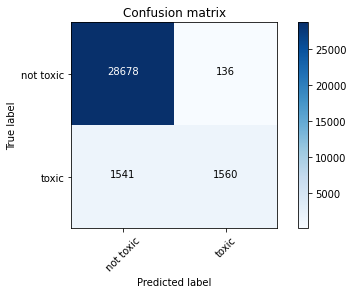

In [ ]:

'''

count_df_train = pd.DataFrame(X_train, columns=list(tfidf_v.get_feature_names()))
count_df_test = pd.DataFrame(X_test, columns=list(tfidf_v.get_feature_names()))
classifier=MultinomialNB()
tag = 'toxic'
print(count_df_train.shape)
print(y_train[tag].shape)
classifier.fit(count_df_train, y_train[tag])
pred = classifier.predict(count_df_test)
score = metrics.accuracy_score(y_test[tag], pred)

print("accuracy:   %0.3f" % score)
print("f1 score:   %0.3f" % f1_score(y_test[tag], pred))


cm = metrics.confusion_matrix(y_test[tag], pred)
plot_confusion_matrix(cm, classes=['not toxic', 'toxic'])
'''


5000 dictionary



```
# This is formatted as code
```

# LSTM


In [ ]:
from nltk import word_tokenize
import nltk
import pandas as pd
import numpy as np
nltk.download('punkt')
nltk.download('stopwords')
df['tokenized_sents'] = df.apply(lambda row: word_tokenize(row['comment_text']), axis=1)
#df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import re
from nltk.corpus import stopwords
stop = stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import itertools
from sklearn.metrics import auc
from sklearn.metrics import f1_score

Text Preprocessing


1.   remove new line
2.   only alphabet
3.   remove stop words
4.   remove multiple spaces
5.   tokenize






In [ ]:
def preprocess(df):
  df['preprocess'] = df.apply(lambda row: row['comment_text'].replace("\n"," "), axis=1) #removes new line character
  df['preprocess'] = df.apply(lambda row: re.sub('[^A-Za-z\' ]+', '',row['preprocess']).lower(), axis=1)
  df['preprocess'] = df['preprocess'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
  df['preprocess'] = df.apply(lambda row: re.sub('  +', ' ',row['preprocess']).strip(), axis=1)
  df['tokenized_sents'] = df.apply(lambda row: word_tokenize(row['preprocess']), axis=1)
  

In [ ]:
preprocess(df)


Checking if after preprocessing blank is there then reverting back to original text

In [ ]:
df["preprocess1"] = df.apply(lambda x: x["comment_text"] if len(x["preprocess"])==0 else x['preprocess'], axis=1)

In [ ]:
traindf=df[['preprocess1','toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']]


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout, LSTM, Embedding, Input
from keras import metrics
import keras

In [ ]:
traind=traindf["preprocess1"]
train_label=traindf[['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']]
tokenizer = Tokenizer(num_words = 20000)
tokenizer.fit_on_texts(traind)
train_final = tokenizer.texts_to_sequences(traind)
traind=pad_sequences(train_final, maxlen=200)

In [ ]:
print(traind.shape,train_label.shape)

(159571, 200) (159571, 6)


In [ ]:
max_features = 20000
embedding_dims = 32

In [ ]:
model = Sequential()
model.add(Embedding(max_features, embedding_dims))
model.add(LSTM(units = embedding_dims, dropout = 0.2, recurrent_dropout = 0.2,return_sequences=True))
model.add(LSTM(units = embedding_dims, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(units = 6, activation = 'sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          640000    
_________________________________________________________________
lstm_6 (LSTM)                (None, None, 32)          8320      
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 198       
Total params: 656,838
Trainable params: 656,838
Non-trainable params: 0
_________________________________________________________________


In [55]:
from sklearn.model_selection import train_test_split
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = [metrics.AUC(),metrics.Recall(), metrics.Accuracy(), metrics.Precision()])
x_train, x_val, y_train, y_val = train_test_split(traind, train_label, shuffle = True, random_state = 123)
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)
#model.fit(x_train, y_train, batch_size = 512, epochs = 10, validation_data = (x_val, y_val))

(119678, 200) (119678, 6) (39893, 200) (39893, 6)
Epoch 1/10
234/234 [==============================] - 360s 2s/step - loss: 0.2973 - auc_1: 0.5897 - recall_1: 0.0171 - accuracy: 0.0000e+00 - precision_1: 0.0380 - val_loss: 0.1392 - val_auc_1: 0.7572 - val_recall_1: 0.0021 - val_accuracy: 0.0000e+00 - val_precision_1: 0.6000
Epoch 2/10
234/234 [==============================] - 356s 2s/step - loss: 0.1383 - auc_1: 0.7765 - recall_1: 0.0043 - accuracy: 0.0000e+00 - precision_1: 0.5118 - val_loss: 0.0784 - val_auc_1: 0.9608 - val_recall_1: 0.2673 - val_accuracy: 0.0000e+00 - val_precision_1: 0.8235
Epoch 3/10
234/234 [==============================] - 353s 2s/step - loss: 0.0706 - auc_1: 0.9684 - recall_1: 0.4806 - accuracy: 0.0000e+00 - precision_1: 0.7974 - val_loss: 0.0561 - val_auc_1: 0.9765 - val_recall_1: 0.6693 - val_accuracy: 0.0000e+00 - val_precision_1: 0.7529
Epoch 4/10
234/234 [==============================] - 352s 2s/step - loss: 0.0531 - auc_1: 0.9794 - recall_1: 0.6489 - 

In [56]:
#model.save('Text_Classification')

INFO:tensorflow:Assets written to: Text_Classification/assets


In [57]:
model = keras.models.load_model('Text_Classification')

In [58]:
pred = model.predict(x_val)
from sklearn import metrics
tags = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']

In [ ]:
pred_df = pd.DataFrame(pred, columns = tags)

In [ ]:
pred_df['toxic'].head()

In [ ]:
y_val['toxic'].head()

Finding threshold probability for each class.

In [62]:
N = 100
threshold = [n / N for n in range(1,N)]
threshold_max = dict(zip(tags,[0]*6))
threshold_argmax = dict(zip(tags,[0]*6))
for i in tags:
  for t in threshold:
    pred_df['tmp'] = (pred_df[i]>= t).astype(int)
    score = metrics.f1_score(y_val[i], pred_df['tmp'])
    if score==0:
      break
    if(score > threshold_max[i]):
      threshold_max[i] = score
      threshold_argmax[i] = t

    #print("%s : f1 score for threshold %0.2f :   %0.3f" %(i, t, score ))
pred_df.drop(columns  = 'tmp', inplace=True)
print(threshold_max)
print(threshold_argmax)

{'toxic': 0.7725495873751268, 'severe_toxic': 0.48816029143898, 'obscene': 0.8025751072961373, 'threat': 0.17843866171003714, 'insult': 0.7038605230386052, 'identity_hate': 0.2689585439838221}
{'toxic': 0.62, 'severe_toxic': 0.17, 'obscene': 0.41, 'threat': 0.09, 'insult': 0.35, 'identity_hate': 0.15}


In [63]:
for i in tags:
  pred_df[i] = (pred_df[i]>= threshold_argmax[i]).astype(int)

In [64]:
score = metrics.f1_score(y_val[i], pred_df[i], average = 'micro')
print(score)

0.9818765196901712


In [177]:
score = metrics.f1_score(y_val[i], pred_df[i], average = 'macro')
print(score)

0.629891533880054


In [65]:
pred_df.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


# Generating Output

In [66]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout, LSTM, Embedding, Input
from keras import metrics
import keras
drive.mount('/content/drive')

test_df = pd.read_csv('/content/drive/MyDrive/Assignment/securly/dataset/dataset/test.csv/test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
test_df_org = test_df.copy()
test_df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [68]:
test_df = test_df_org.copy()
preprocess(test_df)
test_df["preprocess1"] = test_df.apply(lambda x: x["comment_text"] if len(x["preprocess"])==0 else x['preprocess'], axis=1)
test_df = test_df["preprocess1"]
test_final = tokenizer.texts_to_sequences(test_df)
test_df=pad_sequences(test_final, maxlen=200)
del(test_final)

In [ ]:
print(test_df.shape)
print(test_df_org.shape)


Prediction

In [70]:

model = keras.models.load_model('Text_Classification')
out = model.predict(test_df)
from sklearn import metrics
tags = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']

In [71]:
out

array([[9.6800303e-01, 9.0663970e-02, 9.4735152e-01, 2.2505730e-02,
        7.8786790e-01, 8.8183641e-02],
       [1.5453696e-03, 2.4148822e-04, 2.5740266e-04, 2.2706389e-04,
        2.8744340e-04, 2.0965934e-04],
       [1.0284185e-02, 6.3240528e-04, 1.3483167e-03, 7.6428056e-04,
        2.0461977e-03, 1.1085272e-03],
       ...,
       [1.4789999e-03, 2.2539496e-04, 2.2989511e-04, 2.0384789e-04,
        2.5495887e-04, 1.9338727e-04],
       [2.4331808e-03, 2.5609136e-04, 3.8549304e-04, 2.8395653e-04,
        4.2840838e-04, 2.7593970e-04],
       [8.9264500e-01, 1.2271136e-02, 5.1711464e-01, 1.1214584e-02,
        3.9519483e-01, 3.7444234e-02]], dtype=float32)

In [72]:
out_df = pd.DataFrame(out, columns = tags)

In [73]:
out_df.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0.968003,0.090664,0.947352,0.022506,0.787868,0.088184
1,0.001545,0.000241,0.000257,0.000227,0.000287,0.000210
2,0.010284,0.000632,0.001348,0.000764,0.002046,0.001109
3,0.001749,0.000235,0.000284,0.000234,0.000315,0.000221
4,0.003981,0.000336,0.000607,0.000386,0.000742,0.000437


In [178]:
threshold_argmax = {'toxic': 0.62, 'severe_toxic': 0.17, 'obscene': 0.41, 'threat': 0.09, 'insult': 0.35, 'identity_hate': 0.15}

In [179]:
for i in tags:
  out_df[i] = (out_df[i]>= threshold_argmax[i]).astype(int)


In [180]:
print(out_df.head())
print(test_df_org.head())
result= test_df_org.join(out_df)
result.drop(columns='id', inplace= True)

   toxic  severe_toxic  obscene  threat  insult  identity_hate
0  1      0             1        0       1       0            
1  0      0             0        0       0       0            
2  0      0             0        0       0       0            
3  0      0             0        0       0       0            
4  0      0             0        0       0       0            
                 id                                                                                                                                                                                                                                                                                                                                                                     comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about p

In [181]:
result.tail()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
153159,". \n i totally agree, this stuff is nothing but too-long-crap",0,0,0,0,0,0
153160,== Throw from out field to home plate. == \n\n Does it get there faster by throwing to cut off man or direct from out fielder? \n Were the out fielders in the Mickey mantle era have better arms? \n Rich,0,0,0,0,0,0
153161,""" \n\n == Okinotorishima categories == \n\n I see your changes and agree this is """"more correct."""" I had gotten confused, but then found this: \n :... while acknowledging Japan's territorial rights to Okinotorishima itself ... \n However, is there a category for \n :... did not acknowledge Japan's claim to an exclusive economic zone (EEZ) stemming from Okinotorishima. \n That is, is there a category for """"disputed EEZ""""s? """,0,0,0,0,0,0
153162,""" \n\n == """"One of the founding nations of the EU - Germany - has a Law of Return quite similar to Israel's"""" == \n\n This isn't actually true, is it? Germany allows people whose ancestors were citizens of Germany to return, but AFAIK it does not allow the descendants of Anglo-Saxons to """"return"""" to Angeln and Saxony. Israel, by contrast, allows all Jews to """"return"""" to Israel, even if they can't trace a particular ancestral line to anyone who lived in the modern state or even mandate Palestine. — """,0,0,0,0,0,0
153163,""" \n :::Stop already. Your bullshit is not welcome here. I'm no fool, and if you think that kind of explination is enough, well pity you. """,1,0,1,0,1,0


In [182]:
for i in tags:
  result[i+'_cl'] = ''
  result.loc[result[i]==1,i+'_cl'] = i
result['Classes'] = result['toxic_cl']+',' + result['severe_toxic_cl']+',' + result['obscene_cl']+',' + result['threat_cl']+',' + result['insult_cl']+',' + result['identity_hate_cl']


In [183]:
result.head()


,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_cl,severe_toxic_cl,obscene_cl,threat_cl,insult_cl,identity_hate_cl,Classes
0,"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,",1,0,1,0,1,0,toxic,,obscene,,insult,,"toxic,,obscene,,insult,"
1,"== From RfC == \n\n The title is fine as it is, IMO.",0,0,0,0,0,0,,,,,,,",,,,,"
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lapland — / """,0,0,0,0,0,0,,,,,,,",,,,,"
3,":If you have a look back at the source, the information I updated was the correct form. I can only guess the source hadn't updated. I shall update the information once again but thank you for your message.",0,0,0,0,0,0,,,,,,,",,,,,"
4,I don't anonymously edit articles at all.,0,0,0,0,0,0,,,,,,,",,,,,"


In [184]:
result1 = result[['comment_text','Classes']]
result1['Classes'] = result1['Classes'].apply(lambda x: x.replace(",,", ',').replace(",,", ',').replace(",,", ',').replace(",,", ',').replace(",,", ',').replace(",,", ',').replace(",,", ','))
print(result1.head())
result1['Classes'] = result1['Classes'].apply(lambda x: x[:-1])

                                                                                                                                                                                                                                                                                                                                                                      comment_text                Classes
0  Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,  toxic,obscene,insult,
1  == From RfC == \n\n The title is fine as it is, IMO.                                                                                                                                                             

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [185]:
result1.tail(100)

,comment_text,Classes
153064,"==CSD== \n Please read WP:CSD. An article does not have to shown notability to pass speedyit merely has to indicate some possible importance or significance, andsaying someone is a mayor or comparable official is certainly enough for that. The criterion is deliberately narrow, and applied very restrictively. ''''''",
153065,""" \n\n == Citations == \n\n Discussion for improvement should be on talk pages rather than in the article. Here the text about citations recently added: \n :Citation: The Rydeian, the School Magazine, is published yearly: but there is no """"online"""" version of it for this period, but it does exist in """"hard copy"""" and the School does keep copies of all their magazines in their Archives. \n :Every year, the Headmaster addresses the School at Speech Day, some time in September, and the record of this speech is placed in the yearly magazine, The Rydeian. The Headmaster's Speech of September 2002 is of particular note because the son of the Founders, Roy McIsaac, is paid tribute, and it was Roy McIsaac who had helped to save the school in the 1950s when it faced a crisis. \n Citations do not have to be available online but they should be verifiable. This is normally interpreted as publicly accessible in libraries or archives. If copies are not lodged in the local library (I'm not sure that the school archive is a suitable public archive), it may be worth confirming with the school if they would like to make electronic or scanned versions available for free release on Commons. It should be noted that a school magazine is considered a self-published source and so not a suitable reference to re-quote information from other sources (such as school statistics available from independent regulating authorities). When including quotations, please note the guidelines of WP:QUOTEFARM. Thanks, """,
153066,""" \n\n == Requesting review of a revert here == \n\n I did not think my revision was POV. I was trying to correct the promotional language used in that article, including the overuse of titles like """"Dr"""" or """"PhD"""" (which I clarified). Furthermore, at least one major contributor to that article has admitted to working in the office of the politician of whom the biography details.""",
153067,"Bill clinton is al-qaeda, its all about getting power. serbs were right to kill the terrorists. serbs are not communists.",
153068,*The reason for people's objection is that very few people are familiar with Lexicanum or Wikia. WP is the first stop for just about anything.,
...,...,...
153159,". \n i totally agree, this stuff is nothing but too-long-crap",
153160,== Throw from out field to home plate. == \n\n Does it get there faster by throwing to cut off man or direct from out fielder? \n Were the out fielders in the Mickey mantle era have better arms? \n Rich,
153161,""" \n\n == Okinotorishima categories == \n\n I see your changes and agree this is """"more correct."""" I had gotten confused, but then found this: \n :... while acknowledging Japan's territorial rights to Okinotorishima itself ... \n However, is there a category for \n :... did not acknowledge Japan's claim to an exclusive economic zone (EEZ) stemming from Okinotorishima. \n That is, is there a category for """"disputed EEZ""""s? """,
153162,""" \n\n == """"One of the founding nations of the EU - Germany - has a Law of Return quite similar to Israel's"""" == \n\n This isn't actually true, is it? Germany allows people whose ancestors were citizens of Germany to return, but AFAIK it does not allow the descendants of Anglo-Saxons to """"return"""" to Angeln and Saxony. Israel, by contrast, allows all Jews to """"return"""" to Israel, even if they can't trace a particular ancestral line to anyone who lived in the modern state or even mandate Palestine. — """,


In [186]:
result1.to_csv('result.csv')